# 各映画の評価データ分析

In [34]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
reviews_df = pd.read_csv('./movies_df/reviews_id.csv')
reviews_df

,NO.,title,TMDb_ID,Filmarks_ID
0,0,シャー・ルク・カーンのDDLJ／ラブゲット大作戦,19404,16926
1,1,ショーシャンクの空に,278,19119
2,2,ゴッドファーザー,238,12825
3,3,シンドラーのリスト,424,14275
4,4,君の名は。,372058,65931
5,5,ゴッドファーザーPART II,240,38145
6,6,千と千尋の神隠し,129,7752
7,7,パラサイト 半地下の家族,496243,83796
8,8,グリーンマイル,497,16900
9,9,パルプ・フィクション,680,26701


In [123]:
title = 'ゴッドファーザーPART II'

review = reviews_df.query(' title == @title ')
tmdb_id = list(review['TMDb_ID'])[0]
filmarks_id = list(review['Filmarks_ID'])[0]

print(f'title: {title}, tmdb_id: {tmdb_id}, filmarks_id: {filmarks_id}')

movie = pd.read_csv(f'./reviews_df/{tmdb_id}_{filmarks_id}_reviews.csv')
movie['date'] = pd.to_datetime(movie['date'])
movie.head(10)

title: ゴッドファーザーPART II, tmdb_id: 240, filmarks_id: 38145


,review,date
0,3.5,2021-02-10 12:05:00
1,4.0,2021-02-10 01:13:00
2,4.2,2021-02-09 23:11:00
3,5.0,2021-02-09 18:21:00
4,4.0,2021-02-09 00:47:00
5,5.0,2021-02-08 22:15:00
6,4.0,2021-02-08 21:47:00
7,4.0,2021-02-07 17:03:00
8,NaN,2021-02-07 15:54:00
9,4.5,2021-02-07 14:39:00


In [104]:
movie.tail(10)

,review,date
20297,3.5,2012-10-28 14:09:00
20298,5.0,2012-10-28 01:22:00
20299,5.0,2012-10-22 20:26:00
20300,5.0,2012-10-19 10:34:00
20301,5.0,2012-09-19 07:31:00
20302,4.4,2012-09-16 20:31:00
20303,5.0,2012-09-10 20:02:00
20304,4.5,2012-08-27 12:03:00
20305,4.5,2012-08-25 10:08:00
20306,4.5,2012-08-14 21:08:00


In [124]:
movie = movie.dropna(how='any').reset_index(drop=True)
movie.head(10)

,review,date
0,3.5,2021-02-10 12:05:00
1,4.0,2021-02-10 01:13:00
2,4.2,2021-02-09 23:11:00
3,5.0,2021-02-09 18:21:00
4,4.0,2021-02-09 00:47:00
5,5.0,2021-02-08 22:15:00
6,4.0,2021-02-08 21:47:00
7,4.0,2021-02-07 17:03:00
8,4.5,2021-02-07 14:39:00
9,3.6,2021-02-06 01:10:00


In [125]:
movie.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,review,date
count,2894.000000,2894
unique,NaN,2891
top,NaN,2020-05-06 16:38:00
freq,NaN,2
first,NaN,2012-10-09 19:09:00
last,NaN,2021-02-10 12:05:00
mean,4.223186,NaN
std,0.552308,NaN
min,1.000000,NaN
25%,3.900000,NaN


In [ ]:
movie.info()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4133d5450>]],
      dtype=object)

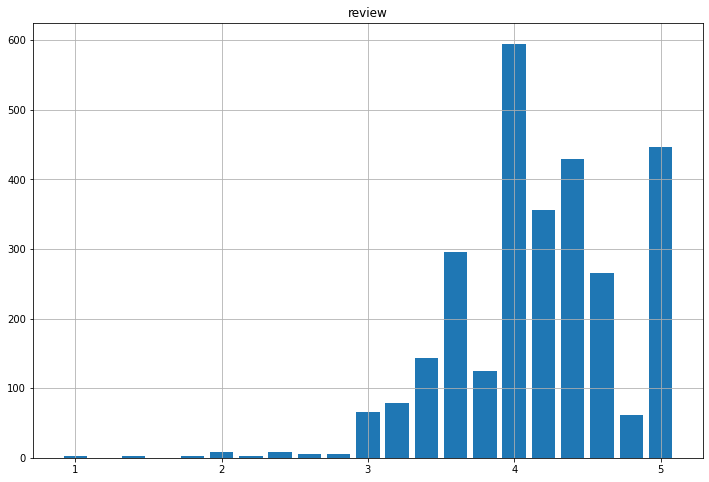

In [127]:
# 1.0 <= bar_1 < 1.2, ..., 5.0 <= bar_21 < 5.2
movie.hist(bins=21, range=(1.0, 5.2), figsize=(12,8), align='left', rwidth=0.8)

## 時系列毎の分析

In [128]:
movie_groupby_year =  movie.groupby(movie.date.dt.year).review.agg(['min', 'mean', 'max', 'count'])
movie_groupby_year

,min,mean,max,count
date,,,,
2012,4.6,4.650000,4.7,2
2013,3.4,4.465217,5.0,46
2014,2.5,4.346154,5.0,91
2015,1.5,4.311170,5.0,188
2016,2.5,4.251613,5.0,341
2017,1.4,4.186141,5.0,469
2018,1.0,4.193095,5.0,391
2019,2.0,4.217621,5.0,454
2020,1.0,4.213462,5.0,780


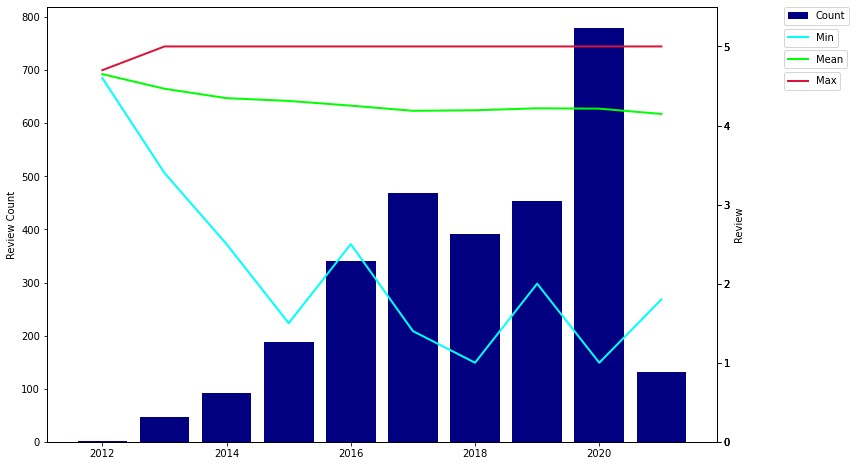

In [129]:
# 各要素をarrayに代入
year_array = np.array(movie_groupby_year.index)
min_array = np.array(movie_groupby_year['min'])
mean_array = np.array(movie_groupby_year['mean'])
max_array = np.array(movie_groupby_year['max'])
count_array = np.array(movie_groupby_year['count'])


# 棒グラフを出力
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.bar(year_array, count_array, align='center', color='navy', linewidth=0, label='Count')
ax1.set_ylabel('Review Count')
plt.legend(loc="upper left", bbox_to_anchor=(1.1, 1.0,), borderaxespad=0)

# 折れ線グラフを出力
min_lim = 0.0
max_lim = 5.5
## Min
ax_min = ax1.twinx()
ax_min.plot(year_array, min_array, linewidth=2, color='cyan', label='Min')
ax_min.set_ylabel('Review')
plt.ylim(min_lim, max_lim)
plt.legend(loc="upper left", bbox_to_anchor=(1.1, 0.95,), borderaxespad=0)

## Mean
ax_mean = ax1.twinx()
ax_mean.plot(year_array, mean_array, linewidth=2, color='lime', label='Mean')
plt.ylim(min_lim, max_lim)
plt.legend(loc="upper left", bbox_to_anchor=(1.1, 0.90,), borderaxespad=0)

## Max
ax_max = ax1.twinx()
ax_max.plot(year_array, max_array, linewidth=2, color='crimson', label='Max')
plt.ylim(min_lim, max_lim)
plt.legend(loc="upper left", bbox_to_anchor=(1.1, 0.85,), borderaxespad=0)